<a href="https://colab.research.google.com/github/asadozzaman/Text-analysis-with-NLP/blob/main/Text_Preprocessing_and_Mining_for_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1GoMMWrIMyvzehPLRX-UMl2_SNbfXNT2Z'})
downloaded.GetContentFile('twitter4000.csv')

In [ ]:
import pandas as pd
import numpy as np
import spacy

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [ ]:
df=pd.read_csv('twitter4000.csv', encoding = "ISO-8859-1")

In [ ]:
df

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0
...,...,...
3995,i just graduated,1
3996,Templating works; it all has to be done,1
3997,mommy just brought me starbucks,1
3998,@omarepps watching you on a House re-run...lov...,1


In [ ]:
df['sentiment'].value_counts()

1    2000
0    2000
Name: sentiment, dtype: int64

In [ ]:
df['twitts'][0]

'is bored and wants to watch a movie  any suggestions?'

## Words Counts

In [ ]:
len('this is text'.split())

3

In [ ]:
df['twitts'][510]

'wishing my @AlbaSeoneAnton sweet dreams and safe travels. shanghai will miss you dearly and so will i '

In [ ]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len
3045,Going out in a minute to make the most of the ...,1,12,38,3.166667
2069,"Morning, Twitterverse. Hope you are all doing ...",1,12,57,4.750000
3999,Thanks for trying to make me smile I'll make y...,1,16,63,3.937500
35,"I was rollin' up Prince Ave, heard all the sir...",0,17,69,4.058824
2615,After prom !,1,3,10,3.333333


In [ ]:
df['word_counts'].max()

32

In [ ]:
df['word_counts'].min()

1

In [ ]:
df[df['word_counts'] == 1]

,twitts,sentiment,word_counts,char_counts,avg_word_len
385,homework,0,1,8,8.0
691,@ekrelly,0,1,8,8.0
1124,disappointed,0,1,12,12.0
1286,@officialmgnfox,0,1,15,15.0
1325,headache,0,1,8,8.0
1897,@MCRmuffin,0,1,10,10.0
2542,Graduated!,1,1,10,10.0
2947,reading,1,1,7,7.0
3176,@omeirdeleon,1,1,12,12.0
3470,www.myspace.com/myfinalthought,1,1,30,30.0


In [ ]:
df['twitts'][510]

'wishing my @AlbaSeoneAnton sweet dreams and safe travels. shanghai will miss you dearly and so will i '

## Characters Count

In [ ]:
len('this is')

7

In [ ]:
def char_counts(x):
  s = x.split()
  x = ''.join(s)
  return len(x)

In [ ]:
char_counts('this is')

6

In [ ]:
df['char_counts']= df['twitts'].apply(lambda x: char_counts(str(x)))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len
3594,"@pdurham uh oh, now you have to be nice.",1,9,32,3.555556
3190,@vintagechick TOP. really nice. x,1,5,29,5.800000
2177,@utaia that's cool i can live with that. you h...,1,17,67,3.941176
1732,@jordanmccuaig I've been keeping a bit of a lo...,0,23,105,4.565217
1960,i can't feel that it is the summer holidays W...,0,14,60,4.285714


In [ ]:
df['twitts'][510]

'wishing my @AlbaSeoneAnton sweet dreams and safe travels. shanghai will miss you dearly and so will i '

## Average Word Length

In [ ]:
x = 'this is' # 6/2 =3
y = 'thankyou guys' # 12/2 = 6

In [ ]:
df['avg_word_len'] = df['char_counts']/ df['word_counts']

In [ ]:
df['twitts'][510]

'wishing my @AlbaSeoneAnton sweet dreams and safe travels. shanghai will miss you dearly and so will i '

In [ ]:
df.sample()

,twitts,sentiment,word_counts,char_counts,avg_word_len
3840,i'm really bored ppl...how r u all? tweet tweet,1,9,39,4.333333


In [ ]:
df['twitts'][510]

'wishing my @AlbaSeoneAnton sweet dreams and safe travels. shanghai will miss you dearly and so will i '

## Stop Words Count

### Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so commonly used that they carry very little useful information.

In [ ]:
print(stopwords)

{'ca', 'my', 'only', 'much', '’d', 'sometimes', 'own', 'eleven', 'see', 'perhaps', 'with', 'them', 'yourselves', '’ll', 'therein', 'third', 'no', 'beyond', 'ourselves', "'re", 'few', 'although', 'himself', 'too', 'never', 'toward', 'he', 'between', '‘d', 'back', 'several', 'whoever', 'less', 'sixty', 'thereby', 'have', 'take', 'anywhere', 'whereas', 'where', 'please', 'beforehand', 'others', 'mostly', 'such', 'formerly', 'whenever', 'five', 'namely', 'than', 'this', 'cannot', 'below', 'through', 'she', 'should', 'anyhow', 'becoming', 'onto', 'per', 'in', 'ten', 'must', 'either', 'three', 'empty', 'its', 'sometime', 'twenty', 'whereupon', 'forty', 'become', 'via', 'wherever', 'using', 'we', "'s", 'when', 'doing', 'indeed', 'yet', 'something', 'almost', 'wherein', 'by', 'unless', 'me', 'whereafter', 'noone', 'except', 'him', 'not', 'someone', 'regarding', 'becomes', 'everyone', 'many', 'of', 'herein', 'within', 'on', 'myself', 'again', 'most', 'towards', 'nor', 'whole', 'bottom', 'upon',

In [ ]:
len(stopwords)

326

In [ ]:
x = 'this is the text data'

In [ ]:
x.split()

['this', 'is', 'the', 'text', 'data']

In [ ]:
[t for t in x.split() if t in stopwords]

['this', 'is', 'the']

In [ ]:
len([t for t in x.split() if t in stopwords])

3

In [ ]:
df['stop_words_len']=df['twitts'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
3751,@DonnieWahlberg Oh 4got to say I am in Christc...,1,11,54,4.909091,4
2147,@Trapes lol - how long do you walk for? Do you...,1,18,67,3.722222,7
2719,http://twitpic.com/5eynj - Office Office. True...,1,6,50,8.333333,0
2038,An amazing interview with dvArtistry on The Lo...,1,13,65,5.000000,4
2681,@ashvanee it's ok babe ! But make sure u check...,1,29,109,3.758621,8


In [ ]:
df['twitts'][510]

'wishing my @AlbaSeoneAnton sweet dreams and safe travels. shanghai will miss you dearly and so will i '

## Count #HashTags and @Mentions

In [ ]:
x = 'this is #hastag and this is @mention'

In [ ]:
x.split()

['this', 'is', '#hastag', 'and', 'this', 'is', '@mention']

In [ ]:
[t for t in x.split() if t.startswith('@')]

['@mention']

In [ ]:
len([t for t in x.split() if t.startswith('@')])

1

In [ ]:
df['hastags_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))

In [ ]:
df['hastags_mention'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention
728,My neck hurts,0,3,11,3.666667,0,0,0
1778,I am so tired and I have two Macbeth as to do ...,0,20,84,4.200000,13,0,0
3677,wishes that he would realize that I love him!!,1,9,38,4.222222,4,0,0
115,Time to read legal docs,0,5,19,3.800000,1,0,0
1541,"@seanx2 Not fair, how come it wasn't opened wh...",0,13,60,4.615385,6,0,1


In [ ]:
df['twitts'][510]

'wishing my @AlbaSeoneAnton sweet dreams and safe travels. shanghai will miss you dearly and so will i '

## If numeric digits present in twitts

In [ ]:
x = 'this is 1 and 2'

In [ ]:
x.split()

['this', 'is', '1', 'and', '2']

In [ ]:
x.split()[2].isdigit()

True

In [ ]:
[t for t in x.split() if t.isdigit()]

['1', '2']

In [ ]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [ ]:
df.sample()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count
3209,Feeling so unmotivated today need some art in...,1,20,81,4.05,8,0,0,0


In [ ]:
df['twitts'][510]

'wishing my @AlbaSeoneAnton sweet dreams and safe travels. shanghai will miss you dearly and so will i '

## UPPER case words count

In [ ]:
x = 'I AM HAPPY'
y = 'i am happy'

In [ ]:
[t for t in x.split() if t.isupper()]

['I', 'AM', 'HAPPY']

In [ ]:
[t for t in y.split() if t.isupper()]

[]

In [ ]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [ ]:
df.sample()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count,upper_counts
101,i wonder if there's a &quot;Crop Circle virus&...,0,25,108,4.32,12,0,0,0,0


In [ ]:
df.iloc[3094]['twitts']

'@taracasper what are you doing here? I thought you were back at work today! '

In [ ]:
df['twitts'][510]

'wishing my @AlbaSeoneAnton sweet dreams and safe travels. shanghai will miss you dearly and so will i '

## Lower Case Conversion

In [ ]:
x = 'this is Text'

In [ ]:
x.lower()

'this is text'

In [ ]:
x = 45.0
str(x).lower()

'45.0'

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: str(x).lower())

In [ ]:
df.sample()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count,upper_counts
3777,@bb517 @bjoie oh man we gotta find a new place,1,10,37,3.7,2,0,2,0,1


In [ ]:
df['twitts'][510]

'wishing my @albaseoneanton sweet dreams and safe travels. shanghai will miss you dearly and so will i '

## Contraction to Expansion


In [ ]:
contractionhh = {
"a'ight" :	"alright",
"ain't" : "am not",
"amn't" :	"am not",
"aren't" :	"are not",
"‘bout" :	"about",
"can't"	: "cannot",
"cap’n" :	"captain",
"'cause" :	"because",
"’cept" :	"except",
"could've":	"could have",
"couldn't"	: "could not",
"couldn't've"	: "could not have",
"dammit" :	"damn it",
"daren't"	: "dare not ",
"daresn't":	"dare not",
"dasn't":	"dare not",
"didn't" :	"did not",
"don't" : "do not",
"he 'll" : "he will ",
"hadn't": "had not",
"hadn't": "had not have",
"has't" : "has not",
"have't": "have not",
"he'd": "he would",
"he'll" : "he will ",
"he'll've" : "he will	have",
"he 's" : "he is",
"how 'd " : "how d id",
"how'd'y " : "how do you ",
"how'll" :	"how will" ,
"how's" : "f how does" ,
"i'd" : "i would ",
    "i'd've" : "i would	have" ,
    "i'll" : "i will" ,
    "i'll've" : "i will	have" ,
    "i'm" : "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd " :	"it would ",
    "it'd've " : "it wou ld have" ,
    "it'll" : "it will ",
    "it'll ' ve" :	"it will have" ,
    "it's" : "it is",
    "let's" : "let us" ,
    "ma'am" : "madam ",
    "mayn't " : "may not ",
    "might've" : "might	have" ,
    "mightn't " : "might	not",
    "must've" : "must have" ,
    "mustn't " : "must not ",
    "mustn't've" : "mu st not	have" ,
    "needn't " : "need not ",
    "needn't ' ve" : "need	not	have" ,
    "o'clock" : "of	the clock ",
    "oughtn't " : "ought	not ",
    "oughtn't ' ve" : "ought not have" ,
    "shan't" : "shall not ",
    "sha'n't " : "shall not ",
    "shan't've" :	"sha ll not",
    "she'd" :	"she would ",
    "she'd've " : "she would",
    "she'll" : "she will ",
    "she'll've" : "she will",
    "she's" : "she is",
    "should've" : "should	have",
    "shouldn't ": "should	not",
    "shouldn't've" : "should	not	have" ,
    "so've" : "so have" ,
    "so's":"so  is",
    "that'd" :	"that	wou ld",
    "that'd ' ve" :	"that wou ld	have",
    "that's" : "that	is",
    "there'd" : "there would",
    "there'd've" : "the re wou ld	have",
    "there's" : "there	is",
    "they'd" : "they would",
    "they'd've" :	"they wou ld	have",
    "they'll" : "they will",
    "they'll've" : "they will have" ,
    "they're" : "t hey are" ,
    "they've" : "they have" ,
    "to've" : "to have"  ,
    "wasn't ": " was not ",
}

In [ ]:
x = "i'm don't  he'll" # "i am do not he will"

In [ ]:
df['twitts'][510]

'wishing my @albaseoneanton sweet dreams and safe travels. shanghai will miss you dearly and so will i '

In [ ]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractionhh:
            value = contractionhh[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [ ]:
cont_to_exp(x)

'i am do not  he will '

In [ ]:
%%timeit
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

10 loops, best of 5: 95.6 ms per loop


In [ ]:
df['twitts'][1960]

'i cannot feel that it is the summer holidays  when will that feeling come??'

## Count and Remove Emails

In [ ]:
import re

df[df['twitts'].str.contains('hotmail.com')]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count,upper_counts
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0


In [ ]:
df.iloc[3713]['twitts']

'@securerecs arghh me please  markbradbury_16@hotmail.com'

In [ ]:
x ='@securerecs arghh me please  markbradbury_16@hotmail.com'

In [ ]:
re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',x)

['markbradbury_16@hotmail.com']

In [ ]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)',x))

In [ ]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [ ]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count,upper_counts,emails,emails_count
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


In [ ]:
re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"",x)

'@securerecs arghh me please  '

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"",x))

In [ ]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count,upper_counts,emails,emails_count
3713,@securerecs arghh me please,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


## Cout URL and remove

In [ ]:
x = 'hi , thanks to watch it, for more visit https://www.youtube.com/watch?v=e-W-4win0iY&list'

In [ ]:
#shh://git@git.com/username/repo.git

In [ ]:
re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)

[('https', 'www.youtube.com', '/watch?v=e-W-4win0iY&list')]

In [ ]:
df['url_flags'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)))

In [ ]:
df[df['url_flags']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count,upper_counts,emails,emails_count,url_flags
16,@brianquest i made 1 fo u 2: http://bit.ly/eid...,0,19,81,4.263158,3,0,1,1,3,[],0,1
98,heading to work http://twitpic.com/4eojz,0,4,37,9.250000,1,0,0,0,0,[],0,1
99,@blondeblogger http://twitpic.com/4w8hk - i am...,0,10,62,6.200000,4,0,1,0,0,[],0,1
144,i miss you ã¢ââ« http://blip.fm/~8lc2f,0,5,35,7.000000,1,0,0,0,2,[],0,1
183,photo: miss germany http://tumblr.com/xf825f012,0,4,44,11.000000,0,0,0,0,0,[],0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,new staark video of &quot;sweet release&quot; ...,1,20,118,5.900000,4,0,0,0,1,[],0,1
3826,http://tinyurl.com/kwmynq helmet - unsung to s...,1,9,76,8.444444,2,0,0,0,0,[],0,2
3837,@r0ckergirl14 wow sweet again!! http://twitpi...,1,5,52,10.400000,0,0,1,0,0,[],0,1
3958,someone has been creative with my #deskmess wh...,1,13,91,7.000000,7,1,1,0,0,[],0,1


In [ ]:
df[df['url_flags']>0].sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count,upper_counts,emails,emails_count,url_flags
2467,woot.going to gibalter. http://myloc.me/2bz6,1,4,41,10.250000,1,0,0,0,0,[],0,1
1188,palm pre na officiãâ¡lnãâ­ch obrãâ¡zcãâ­ch...,0,16,121,7.562500,1,0,0,0,1,[],0,1
1916,http://twitpic.com/68n0t - waffle - this recip...,0,9,51,5.666667,3,0,0,0,0,[],0,1
523,misses your jokes. http://plurk.com/p/12e40f,0,4,41,10.250000,1,0,0,0,0,[],0,1
2168,sweet success http://tinyurl.com/m4sowe,1,3,37,12.333333,0,0,0,0,0,[],0,1


In [ ]:
re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',"",x)

'hi , thanks to watch it, for more visit '

In [ ]:
df['twitts']= df['twitts'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',"",x))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count,upper_counts,emails,emails_count,url_flags
1715,getting ready to go to the car boot sale... ho...,0,17,66,3.882353,7,0,0,0,0,[],0,0
1220,i hate it when my bff is groundedd boooooooooo,0,9,38,4.222222,5,0,0,0,0,[],0,0
3379,@patrick4men2s paddy! welcome to twitter! tha...,1,11,66,6.000000,3,0,1,0,0,[],0,0
2579,okay i am not telling y'all what i am watchin ...,1,14,70,5.000000,4,0,0,0,4,[],0,0
2526,i love nick jonas he's so serious and it is a...,1,10,42,4.200000,3,0,0,0,1,[],0,0


## Remove ret-twitt

In [ ]:
df[df['twitts'].str.contains('rt @')]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count,upper_counts,emails,emails_count,url_flags
2871,@davideisert @lpt21 - never too sunny for lego...,1,13,65,5.0,5,0,2,0,0,[],0,0


In [ ]:
x = 'rt @username: hello hirt'

In [ ]:
re.sub(r'\brt\b','',x).strip()

'@username: hello hirt'

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'\brt\b','',x).strip())

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count,upper_counts,emails,emails_count,url_flags
3290,"@creepygnome shoot--no gnomes, but you can be...",1,14,67,4.785714,7,0,1,0,1,[],0,0
2159,"at the wedding, paul is here wooh! luck loves...",1,15,63,4.200000,6,0,0,0,0,[],0,0
3004,the bbc (r4) will 'keep in touch with demotix ...,1,16,69,4.312500,5,0,0,0,2,[],0,0
3637,"@suareasy let me tell you, spending all you ti...",1,24,100,4.166667,11,0,1,0,1,[],0,0
2134,fry bread house!! time for a lil native food b...,1,18,78,4.333333,6,0,0,0,1,[],0,0


## Special chars removal or punctuation removal

In [ ]:
df.sample(3)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count,upper_counts,emails,emails_count,url_flags
3139,@rhysys i have to wonder what it is,1,8,28,3.500000,5,0,1,0,1,[],0,0
2129,will leave now &amp; forget twitter!!! going ...,1,18,116,6.444444,2,0,1,0,0,[],0,0
2882,tomorrow nite @ club 'home' i am havin a small...,1,25,114,4.560000,5,0,1,0,0,[],0,0


In [ ]:
x= '@shadez noo ..get me links'

In [ ]:
re.sub(r'[^\w]+', " ",x)

' shadez noo get me links'

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x:re.sub(r'[^\w]+', " ",x))

In [ ]:
df['twitts'][2067]

' tommcfly tweet x_sammybaby_x she really wants a reply off you '

Remove muliple space "  hi    hello"


In [ ]:
x = "hi   hello   how are you "

In [ ]:
' '.join(x.split())

'hi hello how are you'

In [ ]:
df['twitts']= df['twitts'].apply(lambda x: ' '.join(x.split()))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count,upper_counts,emails,emails_count,url_flags
508,says woooh its raining,0,5,46,9.200000,1,0,0,0,0,[],0,1
3229,tired goodnight,1,2,16,8.000000,0,0,0,0,0,[],0,0
1941,hey ramon i know we re not close but trust me ...,0,17,71,4.176471,3,0,0,0,1,[],0,0
1980,there is a lifeguard at the knollwood pool nam...,0,21,97,4.619048,9,0,0,0,1,[],0,0
2868,sweetkisses277 oh they were scrambled for sure...,1,17,79,4.647059,7,0,1,0,0,[],0,0


## Remove HTML tags

In [ ]:
!pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
x = '<h1><html> thanks for watching it </h1></html>'

In [ ]:
x.replace('<h1><html>','').replace('</h1></html>','')

' thanks for watching it '

In [ ]:
BeautifulSoup(x,'lxml').get_text()

' thanks for watching it '

In [ ]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x,'lxml').get_text())

CPU times: user 759 ms, sys: 16.2 ms, total: 775 ms
Wall time: 772 ms


In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count,upper_counts,emails,emails_count,url_flags
2596,carrot celery apple juice to start the day,1,10,63,6.300000,2,0,0,0,0,[],0,1
3043,clintyghost cuz it would be cool to chat with ...,1,11,45,4.090909,7,0,1,0,0,[],0,0
3267,bb out to judge the bbq contest here i go imag...,1,22,85,3.863636,6,0,0,0,3,[],0,0
3244,iremember the skipper grows up doll move her a...,1,18,73,4.055556,9,1,0,0,0,[],0,0
707,jacquiinewland omg i havent thrown up soo much...,0,20,88,4.400000,7,0,1,0,3,[],0,0


## Remove Accented chars

In [ ]:
x = 'àáâãäå'

In [ ]:
import unicodedata


In [ ]:
def remove_accented_chars(x):
  x = unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
  return x

In [ ]:
remove_accented_chars(x)

'aaaaaa'

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: remove_accented_chars(x))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count,upper_counts,emails,emails_count,url_flags
3781,blogged my last treasuries on etsy i really lo...,1,14,93,6.642857,7,0,0,0,0,[],0,1
1995,cannot find my camera,0,4,17,4.250000,1,0,0,0,0,[],0,0
2315,whoschrishughes finally got time to view the v...,1,19,93,4.894737,8,0,1,0,0,[],0,0
633,sridgway yeh but lost my camera hoping someone...,0,14,64,4.571429,5,0,1,0,0,[],0,0
2932,wendywings cute time for a twitpic,1,7,32,4.571429,2,0,1,0,0,[],0,0


## Remove Stop words

In [ ]:
x = 'this is a stop words'

In [ ]:
' '.join([t for t in x.split() if t not in stopwords])

'stop words'

In [ ]:
df['twitts_no_stop'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
3649,manuanya hee thanks,1,3,19,6.333333,0,0,1,0,0,[],0,0,manuanya hee thanks
2634,dryueh thanks for you comment on the oc regist...,1,15,100,6.666667,3,0,1,0,1,[],0,1,dryueh thanks comment oc register s social sun...
2552,ready set go aloha,1,4,18,4.500000,0,0,0,0,0,[],0,0,ready set aloha
3558,watching fighting when i should be sleeping i ...,1,14,61,4.357143,8,0,0,0,0,[],0,0,watching fighting sleeping help favorite
1641,govt s not getting the web digitalbritain sigh,0,7,42,6.000000,0,1,0,0,0,[],0,0,govt s getting web digitalbritain sigh


## Convert into base or root form of word

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
x = 'this is chocolates.what is times ? this balls'

In [ ]:
def make_to_base(x):
    x = str(x)
    x_list = []
    doc = nlp(x)

    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma == 'be':
           lemma = token.text

        x_list.append(lemma)
    return ' '.join(x_list)

In [ ]:
make_to_base(x)

'this is chocolates.what is time ? this ball'

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: make_to_base(x))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
2040,indywoodfilm every project is a learn experien...,1,17,124,7.294118,6,0,1,0,0,[],0,0,indywoodfilms project learning experience seen...
3654,ariella44 hey rielle look who s here love you,1,8,39,4.875000,1,0,1,0,0,[],0,0,ariella44 hey rielle look whos love
1556,ronterrell i wish i was there it look like fun,0,12,65,5.416667,3,0,1,0,2,[],0,1,ronterrell wish looks like fun
3426,dougiemcfly yayyy glad your feeling better dou...,1,13,65,5.000000,4,0,1,0,0,[],0,0,dougiemcfly yayyy glad feeling better dougie l...
3065,i love you guy,1,4,13,3.250000,1,0,0,0,1,[],0,0,love guys


## Common words removal

In [ ]:
x = 'this is okay bye'

In [ ]:
len(x)

16

In [ ]:
text = ' '.join(df['twitts'])

In [ ]:
len(text)

274627

In [ ]:
text = text.split()

In [ ]:
len(text)

55779

In [ ]:
freq_comm = pd.Series(text).value_counts()

In [ ]:
f20 = freq_comm[:20]

In [ ]:
f20

i       2586
to      1466
the     1305
a       1224
is       864
my       830
not      807
you      773
it       746
and      720
have     669
do       597
in       582
for      522
go       487
of       482
am       472
that     466
get      447
me       441
dtype: int64

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in f20]))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
3148,dianalovesjb s cool lol u want 2 run over ur c...,1,26,111,4.269231,9,0,1,1,1,[],0,0,dianalovesjb thats cool lol u wanted 2 run ur ...
2147,trape lol how long walk need long time motivat...,1,18,67,3.722222,7,0,1,0,0,[],0,0,trapes lol long walk need long time motivate
3752,one same headfirst are out now two amazing son...,1,16,65,4.062500,9,0,0,0,0,[],0,0,headfirst amazing songs demi sel
2664,jesse236 yeah just got today,1,5,34,6.800000,0,0,1,0,0,[],0,0,jesse236 yeah got today
912,on twitter enough reply ever be relevant on pl...,0,29,108,3.724138,15,0,0,2,0,[],0,0,twitter replies relevant plus note 2 phones me...


## Rare words Removal

In [ ]:
rare20 = freq_comm.tail(20)

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
3275,wooow already lvatt friday here vid make,1,15,72,4.800000,8,0,0,0,1,[],0,1,wooow got lvatt got friday vid
264,itsdarryldsmith noooo leave public jersey wear...,0,9,56,6.222222,2,0,1,0,0,[],0,0,itsdarryldsmith noooo leave public jersey wear...
1878,mad nugget just give up,0,6,24,4.000000,2,0,0,0,0,[],0,0,mad nuggets gave
2873,crystalgibson already,1,4,25,6.250000,2,0,1,0,1,[],0,0,crystalgibson
1205,by maddy2101 ich bin zu doof fa a14r cal typo3...,0,10,50,5.000000,0,2,1,0,0,[],0,0,maddy2101 ich bin zu doof fa a14r cal typo3 ex...


## Word Cloud Visualization

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
text = ' '.join(df['twitts'])

In [ ]:
len(text)

221946

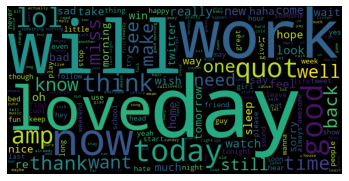

In [ ]:
wc = WordCloud(width = 800, height = 400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

## Spelling Correction

In [ ]:
!pip install -U textblob

     |████████████████████████████████| 636 kB 5.0 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3


In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob

In [ ]:
x= 'thankks forr waching it'

In [ ]:
x = TextBlob(x).correct()

In [ ]:
x

TextBlob("thanks for watching it")

In [ ]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hastags_count,hastags_mention,numerics_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
3164,susanpowter make great soft foot doesn t feel ...,1,17,79,4.647059,6,0,1,0,0,[],0,0,susanpowter makes great soft feet doesn t feel...
1158,foxandfriend wear charlie brown costume before...,0,12,64,5.333333,3,0,1,0,0,[],0,0,foxandfriends worn charlie brown costume feel ...
1578,seriously understand him anymore he confuse so...,0,11,54,4.909091,6,0,0,0,0,[],0,0,seriously understand anymore confuses
2256,barbichick btw see befriend metromix on facebo...,1,20,96,4.800000,7,0,1,0,1,[],0,0,barbichick btw saw befriended metromix faceboo...
3616,holy shiatsu freakin b physics thank kerrigan,1,12,56,4.666667,2,0,0,0,5,[],0,0,holy shiatsu got freakin b physics thank kerrigan


## Tokenization using TextBlob

In [ ]:
x = 'thanks#watching this video.please like it'

In [ ]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video.please', 'like', 'it'])

In [ ]:
doc = nlp(x)
for token in doc:
    print(token)

thanks#watching
this
video.please
like
it


## Detecting Nouns

In [ ]:
x = 'South Africans say "the Sun has gone down" following the death of Desmond Tutu at the age of 90.'

In [ ]:
doc = nlp(x)

In [ ]:
for noun in doc.noun_chunks:
    print(noun)

South Africans
the Sun
the death
Desmond Tutu
the age


## Language Translation and Detection

In [ ]:
x

'South Africans say "the Sun has gone down" following the death of Desmond Tutu at the age of 90.'

In [ ]:
tb = TextBlob(x)

In [ ]:
tb.detect_language()

'en'

In [ ]:
tb.translate(to = 'fr')

TextBlob("Les Sud-Africains disent que "le soleil s'est couché" après la mort de Desmond Tutu à l'âge de 90 ans.")

In [ ]:
tb.translate(to = 'hi')

TextBlob("90 वर्ष की आयु में डेसमंड टूटू की मृत्यु के बाद दक्षिण अफ़्रीकी कहते हैं कि "सूर्य नीचे चला गया है"।")

In [ ]:
tb.translate(to = 'bn')

TextBlob("90 বছর বয়সে ডেসমন্ড টুটুর মৃত্যুর পরে দক্ষিণ আফ্রিকানরা বলে "সূর্য অস্তমিত হয়েছে"।")

## Use TextBlob's Inbuilt Sentiment Classifier

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
x = 'we all stands together. we are gonna win this fight'

In [ ]:
tb= TextBlob(x, analyzer = NaiveBayesAnalyzer())

In [ ]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.9180581552428241, p_neg=0.0819418447571765)